
# <font color=blue>Assignment: GDP Analysis - Hemant Sawakare</font>
**Instructions to run the code**
    1. Do not alter any file name.
    2. Keep the folder structure intact.
    3. Keep all the files in folder where python notebook is located.
    4. Few verification steps are purposely added. Uncomment them and execute as and when required.
    5. Union territories are considered for Part 1-A only.

    

**Folder Structure**  <br>
```GDP Analysis``` #Main Folder
>```Data 1A``` #GDP #State-Wise GDP Data<br>
>```Data II``` #Dropout rate data<br>
>```Data1B``` #Individual State file<br>
>>```UT``` #Folder inside Data1B. Had Union Territories data<br>

## Part-I: GDP Analysis of the Indian States

### Part I-A - 'State-wise Gross Domestic Product (GDP) at current price on yearly basis'.

Calculate the average growth of states for the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row '(% Growth over previous year)' <br>
1. Which states have been growing consistently fast, and which ones have been struggling? <br>

Plot the total GDP of the states for the year 2015-16 <br>
1. Identify the top 5 and the bottom 5 states based on total GDP

<br>

In [1]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

```df_gdp_master``` - Import Data 1A - State-Wise GDP data

In [2]:
# Read csv file into dataframe
df_gdp_master=pd.read_csv("./Data 1A - GDP/State-wise Gross Domestic Product (GDP) at current price on yearly basis.csv")
df_gdp_master.head(2)

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0


In [3]:
# Checking for NA values in data
print(df_gdp_master.isnull().sum()) 

Items  Description            0
Duration                      0
Andhra Pradesh                0
Arunachal Pradesh             2
Assam                         2
Bihar                         2
Chhattisgarh                  0
Goa                           2
Gujarat                       2
Haryana                       0
Himachal Pradesh              4
Jammu & Kashmir               2
Jharkhand                     2
Karnataka                     2
Kerala                        2
Madhya Pradesh                0
Maharashtra                   4
Manipur                       4
Meghalaya                     0
Mizoram                       4
Nagaland                      4
Odisha                        0
Punjab                        4
Rajasthan                     4
Sikkim                        2
Tamil Nadu                    0
Telangana                     0
Tripura                       4
Uttar Pradesh                 2
Uttarakhand                   2
West Bengal1                 11
Andaman 

**Checking for missing value for duration 2013-14, 2014-15 and 2015-16** <br>
We will not check for other period since analysis is focused on these years only.<br>

In [4]:
#2013-14, 2014-15 and 2015-16
chkduration=["2013-14","2014-15","2015-16"]

df_gdp_master[df_gdp_master["Duration"].isin(chkduration)].isnull().sum()

for chkdur in chkduration:
    print("Nulls for {0}".format(chkdur))
    print("**************")
    print(df_gdp_master[df_gdp_master["Duration"]==chkdur].isnull().sum())

Nulls for 2013-14
**************
Items  Description           0
Duration                     0
Andhra Pradesh               0
Arunachal Pradesh            0
Assam                        0
Bihar                        0
Chhattisgarh                 0
Goa                          0
Gujarat                      0
Haryana                      0
Himachal Pradesh             0
Jammu & Kashmir              0
Jharkhand                    0
Karnataka                    0
Kerala                       0
Madhya Pradesh               0
Maharashtra                  0
Manipur                      0
Meghalaya                    0
Mizoram                      0
Nagaland                     0
Odisha                       0
Punjab                       0
Rajasthan                    0
Sikkim                       0
Tamil Nadu                   0
Telangana                    0
Tripura                      0
Uttar Pradesh                0
Uttarakhand                  0
West Bengal1                 2
Andama

**Observation**
1. WB is missing data for entire dataset so we will be ignoring that <br>
2. 2013-14 and 2014-15 - We are missing data for WB only - We will drop that <br>
2. 2015-16 is missing data for few states, We will analyze those <br>
3. 2016-17 is missing data for few states, As we not analyzing data for this period, we will ignore it.

Removing columns for "West Bengal1" since there is no data available. <br>
**Note** - For other states we will analyze the missing values and but will not impute. This is inline with latest recommendation from TAs

In [5]:
#Removing data for "West Bengal"
df_gdp_master.drop(['West Bengal1'], axis=1,inplace=True)

In [6]:
# Checking which states have missing value for 2015-16
df_gdp_master[df_gdp_master["Duration"]=="2015-16"].isnull().sum()

Items  Description           0
Duration                     0
Andhra Pradesh               0
Arunachal Pradesh            0
Assam                        0
Bihar                        0
Chhattisgarh                 0
Goa                          0
Gujarat                      0
Haryana                      0
Himachal Pradesh             2
Jammu & Kashmir              0
Jharkhand                    0
Karnataka                    0
Kerala                       0
Madhya Pradesh               0
Maharashtra                  2
Manipur                      2
Meghalaya                    0
Mizoram                      2
Nagaland                     2
Odisha                       0
Punjab                       2
Rajasthan                    2
Sikkim                       0
Tamil Nadu                   0
Telangana                    0
Tripura                      2
Uttar Pradesh                0
Uttarakhand                  0
Andaman & Nicobar Islands    2
Chandigarh                   0
Delhi   

We have missing value for "Himachal Pradesh","Maharashtra","Manipur","Mizoram","Nagaland","Punjab","Rajasthan","Tripura","West Bengal1" and "Andaman & Nicobar Islands"     

<font color=red>We will not be imputing missing values per latest feedback from TAs. Hence below Section has been purposely commented.</font>


**Creating 2 subset of DataFrame** <br>
1. ```df_gdp_gsdp``` - "GSDP - CURRENT PRICES (` in Crore)"<br>
2. ```df_gdp_pergwth``` - "(% Growth over previous year)"<br>

In [7]:
# #This section will split Datafraame into 2 parts and impute the missing values by mean.

# df_gdp_gsdp=df_gdp_master[df_gdp_master["Items  Description"]=="GSDP - CURRENT PRICES (` in Crore)"].copy()

# df_gdp_pergwth=df_gdp_master[df_gdp_master["Items  Description"]=="(% Growth over previous year)"].copy()

# # Imputing values for - df_gdp_gsdp - "GSDP - CURRENT PRICES (` in Crore)" 
# # Substituting null values with mean 

# chkstates=["Himachal Pradesh","Maharashtra","Manipur","Mizoram","Nagaland","Punjab","Rajasthan","Tripura","Andaman & Nicobar Islands"]

# for chkst in chkstates:
#     df_gdp_pergwth.loc[np.isnan(df_gdp_pergwth[chkst]), [chkst]] = df_gdp_pergwth[chkst].mean()

# # Imputing values for - df_gdp_pergwth - "(% Growth over previous year)" 
# # Substituting null values with mean

# for chkst in chkstates:
#     df_gdp_gsdp.loc[np.isnan(df_gdp_gsdp[chkst]), [chkst]] = df_gdp_gsdp[chkst].mean()


# # df_gdp- Concatenate df_gdp_gsdp and df_gdp_pergwth - We will be using merge version for your analysis

# df_gdp = pd.concat([df_gdp_gsdp, df_gdp_pergwth], axis = 0)


In [8]:
#Remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.
df_gdp = df_gdp_master # Since we skipped imputing
df_gdp=df_gdp[df_gdp["Duration"]!="2016-17"]
df_gdp.head(10) #Verification, Ensuring no data for 2016-17

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,751485.00,359433.00,19208.00,724049.00,115523.00,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,855481.00,401493.00,21663.00,822903.00,131835.00,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,971090.00,452186.00,25593.00,944146.00,149817.00,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,1092564.00,511178.00,29667.00,1043371.00,161985.00,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,1212668.00,575631.00,NaN,1153795.00,184091.00,NaN,30304.00,551963.00,26533.00,13675331.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,13.84,11.70,12.78,13.65,14.12,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15,9.99


```df_gdp_13to16_all``` - Create a dataframe for 2013 thru 2016 for % Growth over previous year

In [9]:
# df_gdp_13to16_all DataFrame will have values for 2013 thru 2016 and (% Growth over previous year)
mask1 = (df_gdp["Items  Description"] =="(% Growth over previous year)")
mask2 = (df_gdp["Duration"]!="2012-13")
mask3 = (df_gdp["Duration"]!="2016-17")
df_gdp_13to16_all=df_gdp[ mask1 & (mask2 & mask3)]

**NOTE**
1. Please note Union Territories are no longer deleted per feedback from TA in discussion forum <br>
2. If Union Territories are not required them execute below cell to remove them <br>

**```df_gdp_13to16``` - Final DataFrame for analysis**

In [10]:
# Define union territories
UT=["Andaman & Nicobar Islands", "Chandigarh", "Delhi", "Puducherry"] 

## Execute below block to remove union territories
# df_gdp_13to16=df_gdp_13to16_all.drop(columns=UT)
# df_gdp_13to16.head(10)

## Equating df_gdp_13to16_all to df_gdp_13to16 since we did not exclude UT.
df_gdp_13to16 = df_gdp_13to16_all
df_gdp_13to16

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15,9.99


In [11]:
# Sorted on value to ensure that plots are more readable
plt_avg=df_gdp_13to16.mean().sort_values()
plt_avg.head

<bound method NDFrame.head of Goa                           6.033333
Meghalaya                     6.953333
Odisha                        9.836667
Sikkim                       10.486667
Jammu & Kashmir              10.900000
Gujarat                      11.126667
Punjab                       11.185000
All_India GDP                11.203333
Maharashtra                  11.260000
Rajasthan                    11.320000
Jharkhand                    11.500000
Uttarakhand                  11.803333
Haryana                      11.846667
Uttar Pradesh                11.940000
Chandigarh                   11.960000
Puducherry                   12.053333
Delhi                        12.160000
Himachal Pradesh             12.280000
Tamil Nadu                   12.336667
Kerala                       12.583333
Madhya Pradesh               12.626667
Assam                        12.650000
Telangana                    12.763333
Bihar                        13.603333
Chhattisgarh                 13.70

**Plot average GDP growth of states for year 2013 to 2016**

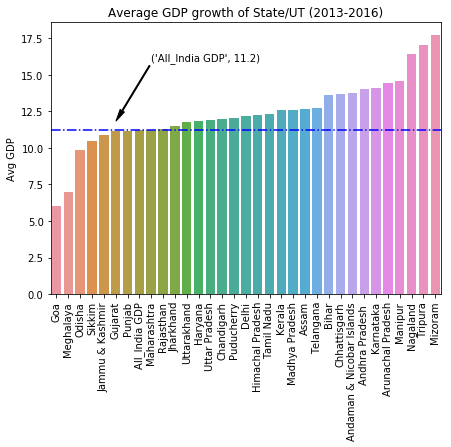

In [12]:
# PLot average GDP growth - 2013 - 2016
plt.figure(figsize=(7, 5))
plt.xticks(rotation=90)

x=plt_avg.index
y=plt_avg.values
y1=round(plt_avg['All_India GDP'],2)

plt.title("Average GDP growth of State/UT (2013-2016)")
plt.ylabel("Avg GDP")

sns.barplot(x,y)
plt.axhline(y1,linestyle="-.",color="b")

plt.annotate(('All_India GDP',y1), xy=(5, 11.8), xytext=(8, 16),
arrowprops=dict(facecolor='black', shrink=0.01, width=1,headwidth=5))

plt.show()

<font color=blue>**Observation-1**  <br>
    1.There is no data for West Bengal. <br>
    2.Mizoram, Tripura, Nagaland, Manipur and Arunachal Pradesh have the highest average GDP growth. <br>
    3.Goa, Meghalaya, Odisha, Sikkim and J&K have the lowest average GDP growth. <br>
    4.Goa, Meghalaya, Odisha, Sikkim, J&K, Gujrat and Punjab are below Nation average GDP growth. <br></font>

```df_totgdp_15to16``` - Creating a new DataFrame for total GDP of the states for the year 2015-16

In [13]:
# Create daataframe for total GDP for 2015-16 
mask4 = (df_gdp["Items  Description"] =="GSDP - CURRENT PRICES (` in Crore)")
mask5 = (df_gdp["Duration"]=="2015-16")
df_totgdp_15to16=df_gdp[mask4 & mask5]

**NOTE** <br>
1. Below step removes UT. But we are not removing it now per feedback from TA on discussion forum. If UT is not required, execute below step**

In [14]:
# #Dropping union territories of India
# df_totgdp_15to16=df_totgdp_15to16.drop(columns=UT)


In [15]:
#Transpose the data
df_totgdp_15to16=df_totgdp_15to16.T
df_totgdp_15to16.head()

,4
Items Description,GSDP - CURRENT PRICES (` in Crore)
Duration,2015-16
Andhra Pradesh,609934
Arunachal Pradesh,18784
Assam,224234


In [16]:
# Drop rows which will not be used for plotting
df_totgdp_15to16 = df_totgdp_15to16.drop(labels=['All_India GDP'],axis=0)
df_totgdp_15to16 = df_totgdp_15to16.drop(labels=['Duration'],axis=0)
df_totgdp_15to16 = df_totgdp_15to16.drop(labels=['Items  Description'],axis=0)

In [17]:
# Rename the columns
df_totgdp_15to16.rename(columns={4:"GSDP - CURRENT PRICES (` in Crore)"},inplace=True)

In [18]:
# Sort dataframe by values
df_totgdp_15to16.sort_values(by="GSDP - CURRENT PRICES (` in Crore)",inplace=True)

**No Data to plot for below states**

In [19]:
# Determining states with no data to plot
df_totgdp_15to16[pd.isnull(df_totgdp_15to16["GSDP - CURRENT PRICES (` in Crore)"])]

,GSDP - CURRENT PRICES (` in Crore)
Himachal Pradesh,NaN
Maharashtra,NaN
Manipur,NaN
Mizoram,NaN
Nagaland,NaN
Punjab,NaN
Rajasthan,NaN
Tripura,NaN
Andaman & Nicobar Islands,NaN


**Plotting total GDP of states for year 2015 - 2016**

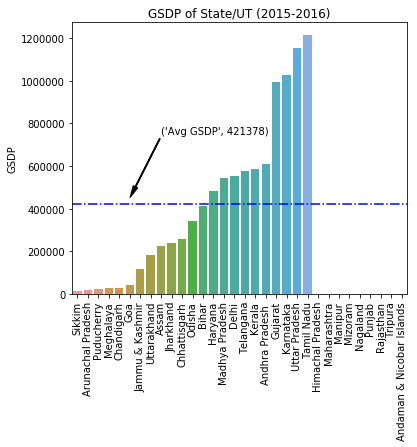

In [20]:
#Plotting total GDP of states for year 2015 - 2016
plt.figure(figsize=(6, 5))
plt.xticks(rotation=90)

x=df_totgdp_15to16.index
y=df_totgdp_15to16["GSDP - CURRENT PRICES (` in Crore)"].values

y1=int(round(df_totgdp_15to16.mean(),2)) # Average GSDP for 2015-16


plt.title("GSDP of State/UT (2015-2016)")
plt.ylabel("GSDP")

#Plot horizontal line for average GSDP for comparison
plt.axhline(y1,linestyle="-.",color="b")

plt.annotate(('Avg GSDP',y1), xy=(5, 450000), xytext=(8,750000),
arrowprops=dict(facecolor='black', shrink=0.01, width=1,headwidth=5))

sns.barplot(x,y)
plt.show()

<font color=blue>**Observation-2**  <br>
1.There is no data for West Bengal. <br>
2.Maharashtra, Tamil Nadu, Uttar Pradesh, Karnataka and Gujarat have the highest GDP. <br>
3.Andaman & Nicobar Islands, Mizoram, Nagaland, Manipur and Sikkim have the lowest GDP. <br>
4.There is no data to plot for below states<br>
>West Bengal <br>
Himachal Pradesh <br>
Maharashtra <br>
Manipur <br>
Mizoram <br>
Nagaland <br>
Punjab <br>
Rajasthan <br>
Tripura</font>

### Part I-B - Duration 2014-15. 

```df_master2``` DataFrame - Load data for all individual state files. <br>
**<font color=Red>Ensure files are in right folder. Else use os.chdir(".\Data1B") to set the correct path</font>**

Perform the analysis only for the duration 2014-15 <br>
Plot the GDP per capita for all the states <br>
1. Identify Top 5 and Bottom 5 <br>
2. Ratio of Highest to Lowest <br>

Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.<br>
Categorize states based on per capita GDP. <br>
For Each category determine top sub-sectors contributing to approx 80% of GDP <br>
Plot the contribution of the sub-sectors as a percentage of the GSDP of each category.<br>

In [21]:
# Read all the csv files from the path and create DataFrame with State suffix
import pandas as pd
import os

# Ensure all files are kept in this directory

os.chdir(".\Data1B") # Comment this line to rerun

# print(os.getcwd()) # Verification step - Uncomment as required

df_master2 = pd.DataFrame(columns=["S.No.","Item","2011-12","2012-13","2013-14","2014-15","2015-16","2016-17","state"])

#Read all files with .csv extension
for file in os.listdir():
    if file.endswith('.csv'):
        df_state=pd.read_csv(file,header=0,encoding = "ISO-8859-1")
        
        #Add state name
        sname=file.split("-")[1]
        df_state["state"]=sname
        
        #Concatenate with previous state data
        df_master2=pd.concat([df_master2,df_state],axis=0,ignore_index=True,sort=False)

df_master2.head()

,S.No.,Item,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,state
0,1,"Agriculture, forestry and fishing",9400805,11186428,12895568,14819416,17326726,20386004,Andhra_Pradesh
1,1.1,Crops,5204052,6123041,7114707,7893514,8644285,9717089,Andhra_Pradesh
2,1.2,Livestock,2758776,3358438,3643026,4309078,5155487,5979648,Andhra_Pradesh
3,1.3,Forestry and logging,250314,253029,280493,346160,340550,335487,Andhra_Pradesh
4,1.4,Fishing and aquaculture,1187663,1451920,1857342,2270664,3186404,4353780,Andhra_Pradesh


**Filter out Union Territories**

In [22]:
# Select a subset by removing Union Territories.
UTs = ["Andaman_Nicobar_Islands", "Chandigarh", "Delhi", "Puducherry"] 
df_master2=df_master2[~df_master2["state"].isin(UTs)]

#Checking number of states to ensure Union Territories are filtered
df_master2["state"].unique()

array(['Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal_Pradesh',
       'Jammu_Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya_Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil_Nadu', 'Telangana', 'Tripura', 'Uttarakhand',
       'Uttar_Pradesh'], dtype=object)

```df_gsdp_combined``` - Combine all individual state file to single DataFrame (ALL GSDP Combined)

In [23]:
# Subset for 2014-15 data.
df_gsdp_combined=pd.DataFrame(columns=["S.No.","Item","2014-15","state"])
df_gsdp_combined=df_master2[["S.No.","Item","2014-15","state"]]
df_gsdp_combined.head()

,S.No.,Item,2014-15,state
0,1,"Agriculture, forestry and fishing",14819416,Andhra_Pradesh
1,1.1,Crops,7893514,Andhra_Pradesh
2,1.2,Livestock,4309078,Andhra_Pradesh
3,1.3,Forestry and logging,346160,Andhra_Pradesh
4,1.4,Fishing and aquaculture,2270664,Andhra_Pradesh


```df1_perCapita_GDP``` - Create a separate DataFrame for Per Capita GDP

In [24]:
# Create a GDP for Per Capita GDP
df1_perCapita_GDP = df_gsdp_combined[df_gsdp_combined["Item"]=="Per Capita GSDP (Rs.)"].sort_values(by="2014-15",ascending=False)

df1_perCapita_GDP.set_index('state',inplace=True)

df1_perCapita_GDP.head()

,S.No.,Item,2014-15
state,,,
Goa,17,Per Capita GSDP (Rs.),271793
Sikkim,17,Per Capita GSDP (Rs.),240274
Haryana,17,Per Capita GSDP (Rs.),164077
Kerala,17,Per Capita GSDP (Rs.),154778
Uttarakhand,17,Per Capita GSDP (Rs.),153076


**Plot the GDP per capita for all the states.**

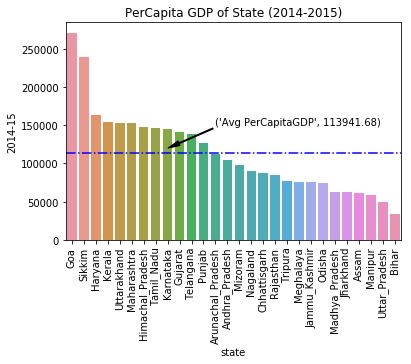

In [25]:
# Plot the GDP per capita for all the states
plt.figure(figsize=(6,4))
plt.xticks(rotation=90)

x=df1_perCapita_GDP.index
y=df1_perCapita_GDP["2014-15"]

#average per Capita GDP
y1=round(df1_perCapita_GDP["2014-15"].mean(),2)

plt.title("PerCapita GDP of State (2014-2015)")
plt.ylabel("Per Capita GDP")

#Plotting average per Capita GDP
plt.axhline(y1,linestyle="-.",color="b")

plt.annotate(('Avg PerCapitaGDP',y1), xy=(8, 120000), xytext=(12,150000),
arrowprops=dict(facecolor='black', shrink=0.01, width=1,headwidth=5))

sns.barplot(x,y)
plt.show()

**Ratio of the highest per capita GDP to the lowest per capita GDP**

In [26]:
# Fetch Highest and Lowest GDP and respective state names
highGDPkey=df1_perCapita_GDP.index.values[0]
LowGDPkey=df1_perCapita_GDP.index.values[-1]
highGDPval=df1_perCapita_GDP["2014-15"].values[0]
LowGDPval=df1_perCapita_GDP["2014-15"].values[-1]

print("Ratio of the highest per capita GDP ({0}) to the lowest per capita GDP ({1}) is {2}".format(highGDPkey,LowGDPkey,round((highGDPval / LowGDPval),2)))

Ratio of the highest per capita GDP (Goa) to the lowest per capita GDP (Bihar) is 8.0


<font color=blue>**Observation-3**  <br>
1.Top 5 states with Per Capital GDP are - Goa, Sikkim, Haryana, Kerala and Uttarakhand. <br>
2.Bottom 5 states with Per Capital GDP are -  Bihar, Uttar_Pradesh, Manipur, Assam and Jharkhand. <br>
3.Ratio of the highest per capita GDP (Goa) to the lowest per capita GDP (Bihar) is 8.0 <br></font>

**Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP**

```df_all``` - Create combined DataFrame with Primary, Secondary, Tertiary and Derived Column (Other) for all states <br>
For simplicity We are deriving a field others = Taxes on Products - Subsidies on products

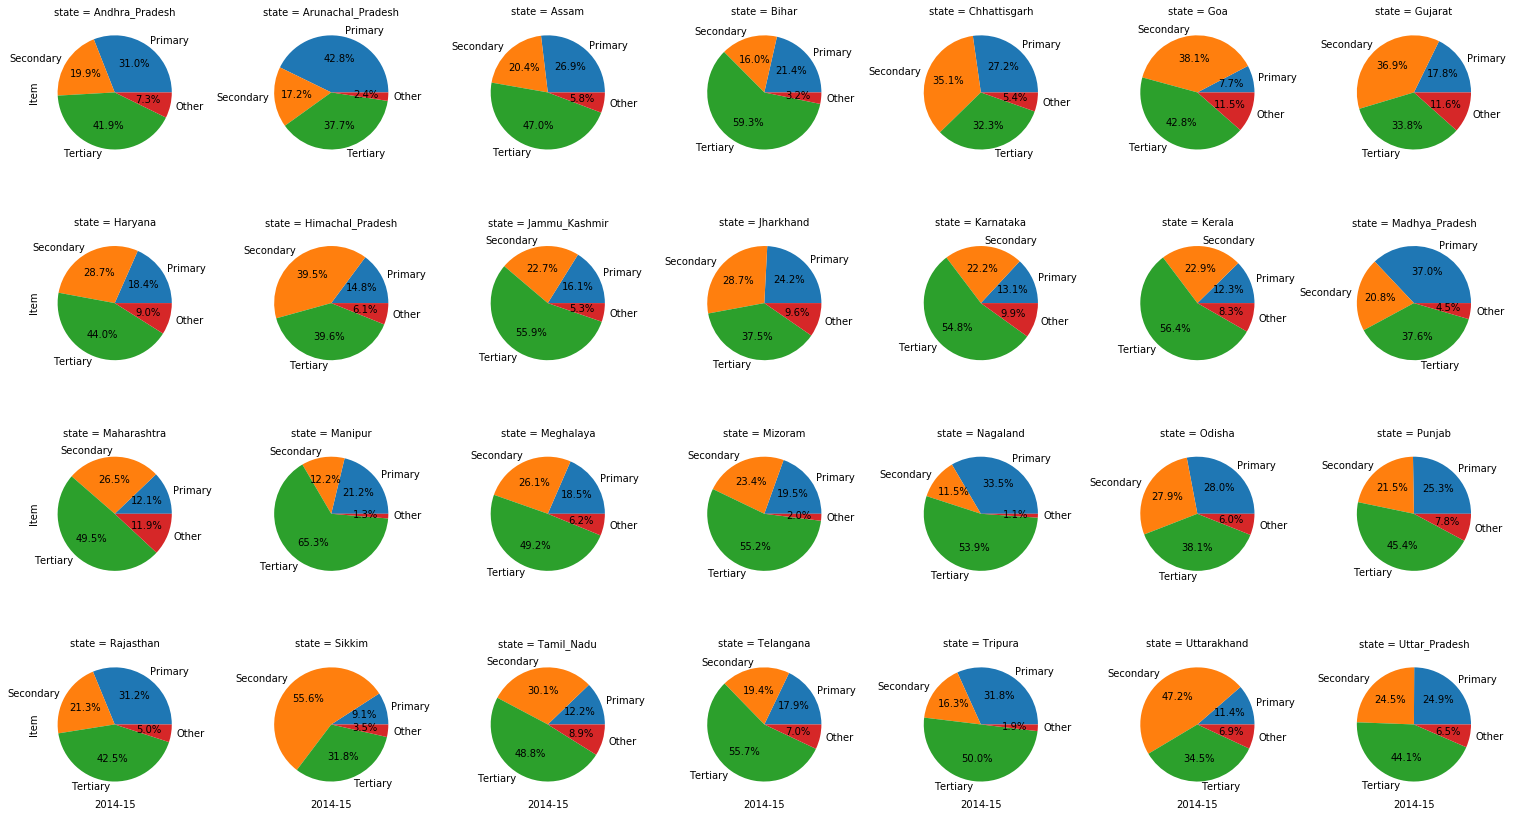

In [27]:
# Pie charts for Primary, Secondary and Tertiary contribution to each state GDP.

#Subset for sector wise data - primary, Secondary, Tertiary and Others

df_all=pd.DataFrame(columns=['Item', '2014-15', 'state'])
oth_df=pd.DataFrame(columns=['state', 'misc'])
oth_df2=pd.DataFrame(columns=['state', 'misc2'])
other_append=pd.DataFrame(columns=['Item', '2014-15', 'state'])

mask6 =df_master2["S.No."]=="Total"

#Calculation for derived varible "Other"
#Other - GDP - GSVA Basic (i.e. Taxes - Subsidies)
oth_df[["state","misc"]]=df_master2[df_master2["Item"]=="Gross State Domestic Product"][["state","2014-15"]]
oth_df2[["state","misc2"]]=df_master2[df_master2["Item"]=="TOTAL GSVA at basic prices"][["state","2014-15"]]

#oth_df_all will have state-misc-misc2 columns
oth_df_all=pd.merge(oth_df,oth_df2,how='inner',on='state')  

# Converting to numeric value
oth_df_all["misc"]=pd.to_numeric(oth_df_all["misc"])
oth_df_all["misc2"]=pd.to_numeric(oth_df_all["misc2"])
oth_df_all["2014-15"] = oth_df_all["misc"] - oth_df_all["misc2"]

# Adding column (Dervied) to dataframe
other_append[["state","2014-15"]]=oth_df_all[["state","2014-15"]]

#Populate Item = Other
other_append.loc[pd.isnull(other_append["Item"]),["Item"]] = "Other"

#Selecting only Primary, Secondary and Tertiary from df_master2
df_all=df_master2[mask6][["Item","2014-15","state"]]

#Add this to master Dataframe
df_all=df_all.append(other_append,ignore_index=True,sort=False)

# Plot pie chart for individual states.
def pie(v, l, color=None):
    plt.pie(v, labels=l.values,autopct='%1.1f%%')
    
g = sns.FacetGrid(df_all, col="state",col_wrap=7)
g.map(pie, "2014-15","Item")

**Curosity - Plotting average sector contribution for comparison**

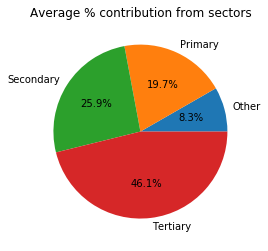

In [28]:
# Plot combined contribution for sectors for period of 2014-15
dfx=df_all.copy()

#Converting GDP columns (Primary/Secondary/Tertiary) to numeric
dfx["2014-15"] = pd.to_numeric(dfx["2014-15"], errors='coerce')

# Taking mean of Primary/Seconday/Tertiary to plot
dfg=dfx[["Item","2014-15"]].groupby("Item").mean()

l=dfg.index
v=dfg["2014-15"].values

plt.pie(v, labels=l,autopct='%1.1f%%')
plt.title("Average % contribution from sectors")
plt.show()

**Quantile Calculation**<br>
Category1 - Greater than 85<br>
Category2 - Greater than 50 and Less than or equal to 85<br>
Category3 - Greater than 20 and Less than or equal to 50<br>
Category4 - Less than or equal to 20<br>

```df_c1,df_c2,df_c3,df_c4``` - DataFrame for each category

In [29]:
# Calculating quantile
q1=df1_perCapita_GDP["2014-15"].quantile(q=.20)
q2=df1_perCapita_GDP["2014-15"].quantile(q=.50)
q3=df1_perCapita_GDP["2014-15"].quantile(q=.85)

#Print quantile values
print("Quantile .25: ", q1)
print("Quantile .50: ", q2)
print("Quantile .85: ", q3)

#Create dataframes with per Capita GDP for each category
df_c1=df1_perCapita_GDP[df1_perCapita_GDP["2014-15"]>q3]
df_c2=df1_perCapita_GDP[(df1_perCapita_GDP["2014-15"]>q2) & (df1_perCapita_GDP["2014-15"]<=q3)]
df_c3=df1_perCapita_GDP[(df1_perCapita_GDP["2014-15"]>q1) & (df1_perCapita_GDP["2014-15"]<=q2)]
df_c4=df1_perCapita_GDP[df1_perCapita_GDP["2014-15"]<=q1]

Quantile .25:  67385.0
Quantile .50:  101332.0
Quantile .85:  153064.85


List with states under c1,c2,c3 and c4 category

In [30]:
#Create list for states in c1 category
c1_state = df_c1.index.tolist()
print("States in C1: ",c1_state)

#Create list for states in c2 category
c2_state = df_c2.index.tolist()
print("States in C2: ",c2_state)

#Create list for states in c3 category
c3_state = df_c3.index.tolist()
print("States in C3: ",c3_state)

#Create list for states in c4 category
c4_state = df_c4.index.tolist()
print("States in C4: ",c4_state)

States in C1:  ['Goa', 'Sikkim', 'Haryana', 'Kerala', 'Uttarakhand']
States in C2:  ['Maharashtra', 'Himachal_Pradesh', 'Tamil_Nadu', 'Karnataka', 'Gujarat', 'Telangana', 'Punjab', 'Arunachal_Pradesh', 'Andhra_Pradesh']
States in C3:  ['Mizoram', 'Nagaland', 'Chhattisgarh', 'Rajasthan', 'Tripura', 'Meghalaya', 'Jammu_Kashmir', 'Odisha']
States in C4:  ['Madhya_Pradesh', 'Jharkhand', 'Assam', 'Manipur', 'Uttar_Pradesh', 'Bihar']


In [31]:
#Uncomment for validation or cheking
#Dataframe with all states' Per Capita GDP - 2014-15
#
# df_GDPperCap_all

DataFrame ```GDP_all``` - Sub-Sectors GDP contribution for all states for columns [Item, 2014-15, state]

In [32]:
#Create DataFrame for year 2014-15 for subsectors for various states
# itm=["TOTAL GSVA at basic prices","Per Capita GSDP (Rs.)","Population ('00)","Taxes on Products","Subsidies on products"]
itm=["TOTAL GSVA at basic prices","Per Capita GSDP (Rs.)","Population ('00)"]
mask1 = df_gsdp_combined["S.No."]!="Total"
mask2 = ~df_gsdp_combined["Item"].isin(itm)
mask3 = df_gsdp_combined["S.No."].apply(lambda c:c.isdigit()) #Picking only sub-sectors
df_GDP_all = df_gsdp_combined[mask1 & mask2 & mask3]

**Sector-wise contribution on Category Level for average sector contribution**

In [33]:
#df_c<n>_sector - DataFrame with sector wise contribution
df_c1_sector=df_all[df_all["state"].isin(c1_state)].copy()
df_c1_sector["2014-15"] = pd.to_numeric(df_c1_sector["2014-15"])
df_c1_sector_grp=df_c1_sector.groupby("Item").mean()

df_c2_sector=df_all[df_all["state"].isin(c2_state)].copy()
df_c2_sector["2014-15"] = pd.to_numeric(df_c2_sector["2014-15"])
df_c2_sector_grp=df_c2_sector.groupby("Item").mean()

df_c3_sector=df_all[df_all["state"].isin(c3_state)].copy()
df_c3_sector["2014-15"] = pd.to_numeric(df_c3_sector["2014-15"])
df_c3_sector_grp=df_c3_sector.groupby("Item").mean()

df_c4_sector=df_all[df_all["state"].isin(c4_state)].copy()
df_c4_sector["2014-15"] = pd.to_numeric(df_c4_sector["2014-15"])
df_c4_sector_grp=df_c4_sector.groupby("Item").mean()

**Curosity - Plot pie charts for each Category**

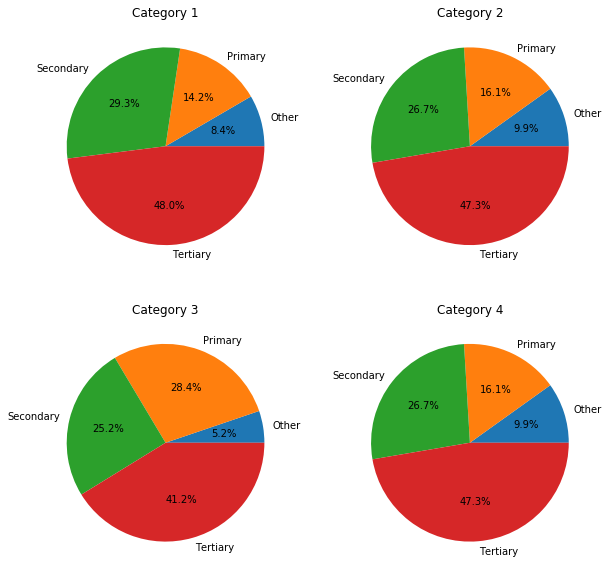

<Figure size 432x288 with 0 Axes>

In [34]:
#Plot pie charts for Category
plt.figure(1,figsize=(10,10))

# create the first subplot in figure 1 
# %Sector contribution for Category 1
plt.subplot(2,2,1)
l=df_c1_sector_grp.index
v=df_c1_sector_grp["2014-15"]

plt.pie(v, labels=l,autopct='%1.1f%%')
plt.title("Category 1")

# create the first subplot in figure 2
# %Sector contribution for Category 2
plt.subplot(2,2,2)
l=df_c2_sector_grp.index
v=df_c2_sector_grp["2014-15"]

plt.pie(v, labels=l,autopct='%1.1f%%')
plt.title("Category 2")


# create the first subplot in figure 3 
# %Sector contribution for Category 3
plt.subplot(2,2,3)
l=df_c3_sector_grp.index
v=df_c3_sector_grp["2014-15"]

plt.pie(v, labels=l,autopct='%1.1f%%')
plt.title("Category 3")


# create the first subplot in figure 4 
# %Sector contribution for Category 4
plt.subplot(2,2,4)
l=df_c2_sector_grp.index
v=df_c2_sector_grp["2014-15"]

plt.pie(v, labels=l,autopct='%1.1f%%')
plt.title("Category 4")
plt.show()

plt.tight_layout()
plt.show()

Curosity - Nested Pie to determine contribution by individual categories to overall GDP sector-wise

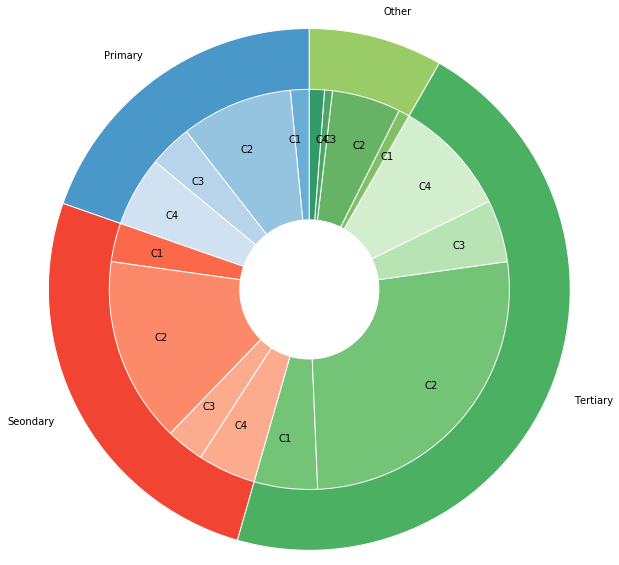

In [35]:
# PLot to determine how much each category is contributing to a particular sector
fig, ax = plt.subplots()

group_names=['Primary','Seondary','Tertiary','Other']
group_size=[218077590,287398113,512056980,92037347]
subgroup_names=['C1','C2','C3','C4','C1','C2','C3','C4','C1','C2','C3','C4','C1','C2','C3','C4', ]
subgroup_size=[16826743,100040113,38379271,62831463,34667105,166519491,34138273,52073244,56709641,294673198,55790069,104884072,9925716,61595966,7052379,13463286]

# Create colors
a,b,c,d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens,plt.cm.summer]


# First Ring (outside)
# fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=3.0, labels=group_names, colors=[a(0.6), b(0.6), c(0.6) ,d(0.6)],startangle=90)
plt.setp( mypie, width=0.8, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=3.0-0.7, labels=subgroup_names, labeldistance=0.75, colors=[a(0.5),a(0.4),a(0.3),a(0.2),b(0.5),b(0.4),b(0.3),b(0.3),c(0.5),c(0.5),c(0.3),c(0.2),d(0.5),d(0.4),d(0.3),d(0.2)],startangle=90)
plt.setp( mypie2, width=1.5, edgecolor='white')


# plt.legend(labels,bbox_to_anchor=(1.5, 1.5))


lines = ["C1","C2","C3","C4"]
labels = ["Cat 1","Cat 2","Cat 3","Cat 4"]


plt.show()

**C1 Category:** <br>
Create df_GDP_c1_all DataFrame for c1 category and 80% of GDP

In [36]:
#Create DataFrame for Category1

df_GDP_c1_all=df_GDP_all[df_GDP_all["state"].isin(c1_state)]
df_GDP_c1_all_grp=df_GDP_c1_all.groupby("Item")

df_GDP_c1_all_grp_sum=df_GDP_c1_all_grp.sum().sort_values(by="2014-15",ascending = False)

#Calcualte 80% of total GDP for category1
c1_GSDP80per= round((df_GDP_c1_all_grp_sum['2014-15'][0]) *.80,2)

#Sort by items
df_GDP_c1_all.sort_values(by="Item")
print("C1 80% GDP: ",c1_GSDP80per)

C1 80% GDP:  94503364.8


Calculate 80% for c1 category

In [37]:
# Determining top 80% contribution from subsectors

l1=len(df_GDP_c1_all_grp_sum.index)

#Exclude "Taxes on Products" and "Subsidies on products" from calculation of 80%
exlsum=["Taxes on Products","Subsidies on products"]

gdp80per=0
for i in range(1,l1):
    if(gdp80per<c1_GSDP80per):
        if((df_GDP_c1_all_grp_sum.index[i]==exlsum[0]) or(df_GDP_c1_all_grp_sum.index[i]==exlsum[1])):
            pass
        else:
            gdp80per=gdp80per + (df_GDP_c1_all_grp_sum["2014-15"].iloc[i])
        if(gdp80per<c1_GSDP80per):
            prevgdp80=gdp80per
        else:
            break
    else:
        break
# print(i,prevgdp80,gdp80per)

**Total top sub-sectors with Total GDP for c1 category**

In [38]:
# Total top sub-sectors with Total GDP for c1 category

df_GDP_topc1_subcat = df_GDP_c1_all_grp_sum.iloc[1:i]
df_GDP_topc1_subcat[~df_GDP_topc1_subcat.index.isin(exlsum)]["2014-15"]

Item
Manufacturing                                                 19625045.0
Agriculture, forestry and fishing                             15993232.0
Trade, repair, hotels and restaurants                         15738265.0
Real estate, ownership of dwelling & professional services    15571552.0
Construction                                                  12607184.0
Other services                                                 9042352.0
Name: 2014-15, dtype: float64

**C2 Category:**<br>
Create df_GDP_c2_all DataFrame for c2 category  and 80% of GDP

In [39]:
#Create DataFrame for Category2

df_GDP_c2_all=df_GDP_all[df_GDP_all["state"].isin(c2_state)]
df_GDP_c2_all_grp=df_GDP_c2_all.groupby("Item")

df_GDP_c2_all_grp_sum=df_GDP_c2_all_grp.sum().sort_values(by="2014-15",ascending = False)

#Calcualte 80% of total GDP for category2
c2_GSDP80per= round((df_GDP_c2_all_grp_sum['2014-15'][0]) *.80,2)

#Sort by items
df_GDP_c2_all.sort_values(by="Item")

print(c2_GSDP80per)

498263012.0


Calculate 80% for c2 category

In [40]:
# Determining top 80% contribution from subsectors

l1=len(df_GDP_c2_all_grp_sum.index)

gdp80per=0
for i in range(1,l1):
    if(gdp80per<c2_GSDP80per):
        if((df_GDP_c2_all_grp_sum.index[i]==exlsum[0]) or(df_GDP_c2_all_grp_sum.index[i]==exlsum[1])):
            pass
        else:
            gdp80per=gdp80per + (df_GDP_c2_all_grp_sum["2014-15"].iloc[i])
        if(gdp80per<c2_GSDP80per):
            prevgdp80=gdp80per
        else:
            break
    else:
        break

**Total top sub-sectors with Total GDP for c2 category**

In [41]:
# Total top sub-sectors with Total GDP for c2 category

df_GDP_topc2_subcat = df_GDP_c2_all_grp_sum.iloc[1:i]
df_GDP_topc2_subcat[~df_GDP_topc2_subcat.index.isin(exlsum)]["2014-15"]

Item
Manufacturing                                                 108002544.0
Real estate, ownership of dwelling & professional services     95695548.0
Agriculture, forestry and fishing                              88427015.0
Trade, repair, hotels and restaurants                          63729156.0
Construction                                                   43975718.0
Other services                                                 39486616.0
Financial services                                             37812475.0
Name: 2014-15, dtype: float64

**C3 Category:** <br>
Create df_GDP_c3_all DataFrame for c3 category  and 80% of GDP

In [42]:
#Create DataFrame for Category3

df_GDP_c3_all=df_GDP_all[df_GDP_all["state"].isin(c3_state)]
df_GDP_c3_all_grp=df_GDP_c3_all.groupby("Item")

df_GDP_c3_all_grp_sum=df_GDP_c3_all_grp.sum().sort_values(by="2014-15",ascending = False)

#Calcualte 80% of total GDP for category3
c3_GSDP80per= round((df_GDP_c3_all_grp_sum['2014-15'][0]) *.80,2)

#Sort by items
df_GDP_c3_all.sort_values(by="Item")

print(c3_GSDP80per)

108287992.8


Calculate 80% for c3 category

In [43]:
# Determining top 80% contribution from subsectors

l1=len(df_GDP_c3_all_grp_sum.index)

gdp80per=0
for i in range(1,l1):
    if(gdp80per<c3_GSDP80per):
        if((df_GDP_c3_all_grp_sum.index[i]==exlsum[0]) or(df_GDP_c3_all_grp_sum.index[i]==exlsum[1])):
            pass
        else:
            gdp80per=gdp80per + (df_GDP_c3_all_grp_sum["2014-15"].iloc[i])
        if(gdp80per<c3_GSDP80per):
            prevgdp80=gdp80per
        else:
            break
    else:
        break

**Total top sub-sectors with Total GDP for c3 category**

In [44]:
# Total top sub-sectors with Total GDP for c3 category

df_GDP_topc3_subcat = df_GDP_c3_all_grp_sum.iloc[1:i]
df_GDP_topc3_subcat[~df_GDP_topc3_subcat.index.isin(exlsum)]["2014-15"]

Item
Agriculture, forestry and fishing                             28994177.0
Manufacturing                                                 18259272.0
Trade, repair, hotels and restaurants                         13901840.0
Real estate, ownership of dwelling & professional services    13158791.0
Construction                                                  11828535.0
Other services                                                 9546854.0
Mining and quarrying                                           9385092.0
Name: 2014-15, dtype: float64

**C4 Category** <br>
Create df_GDP_c4_all DataFrame for c4 category  and 80% of GDP

In [45]:
#Create DataFrame for Category4

df_GDP_c4_all=df_GDP_all[df_GDP_all["state"].isin(c4_state)]
df_GDP_c4_all_grp=df_GDP_c4_all.groupby("Item")

df_GDP_c4_all_grp_sum=df_GDP_c4_all_grp.sum().sort_values(by="2014-15",ascending = False)

#Calcualte 80% of total GDP for category4
c4_GSDP80per= round((df_GDP_c4_all_grp_sum['2014-15'][0]) *.80,2)

#Sort by items
df_GDP_c4_all.sort_values(by="Item")

print(c4_GSDP80per)

186601652.8


Calculate 80% for c4 category

In [46]:
# Determining top 80% contribution from subsectors

l1=len(df_GDP_c4_all_grp_sum.index)

gdp80per=0
for i in range(1,l1):
    if(gdp80per<c4_GSDP80per):
        if((df_GDP_c4_all_grp_sum.index[i]==exlsum[0]) or(df_GDP_c4_all_grp_sum.index[i]==exlsum[1])):
            pass
        else:
            gdp80per=gdp80per + (df_GDP_c4_all_grp_sum["2014-15"].iloc[i])
        if(gdp80per<c4_GSDP80per):
            prevgdp80=gdp80per
        else:
            break
    else:
        break

**Total top sub-sectors with Total GDP for c4 category**

In [47]:
# Total top sub-sectors with Total GDP for c4 category

df_GDP_topc4_subcat = df_GDP_c4_all_grp_sum.iloc[1:i]
df_GDP_topc4_subcat[~df_GDP_topc4_subcat.index.isin(exlsum)]["2014-15"]

Item
Agriculture, forestry and fishing                                       56735044.0
Trade, repair, hotels and restaurants                                   27221645.0
Manufacturing                                                           24937531.0
Real estate, ownership of dwelling & professional services              24018199.0
Construction                                                            22632766.0
Transport, storage, communication & services related to broadcasting    16082074.0
Name: 2014-15, dtype: float64

**Pie charts to determine sub-category contribution for each category**

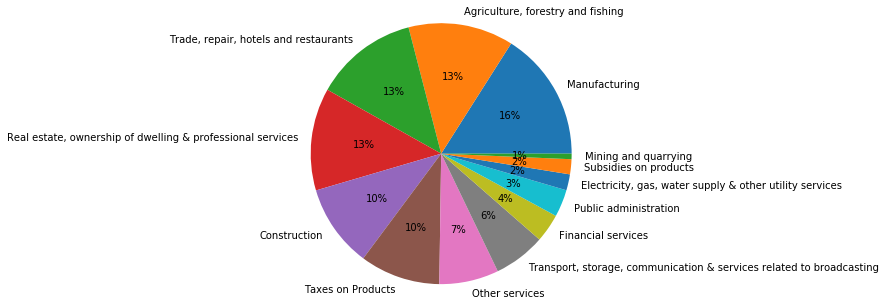

In [48]:
# Pie chart for Category1

df_GDP_pie=df_GDP_c1_all_grp_sum[df_GDP_c1_all_grp_sum.index!="Gross State Domestic Product"]["2014-15"]

labels = df_GDP_pie.index.tolist()
sizes = df_GDP_pie.values.tolist()

plt.pie(sizes, labels=labels, autopct='%1.0f%%',shadow=False,radius=1.5)
plt.show()

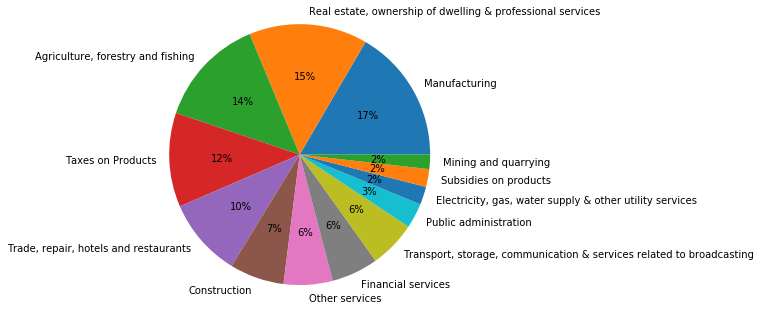

In [49]:
# Pie chart for Category2

df_GDP_pie2=df_GDP_c2_all_grp_sum[df_GDP_c2_all_grp_sum.index!="Gross State Domestic Product"]["2014-15"]

labels = df_GDP_pie2.index.tolist()
sizes = df_GDP_pie2.values.tolist()

plt.pie(sizes, labels=labels, autopct='%1.0f%%',shadow=False,radius=1.5)
plt.show()

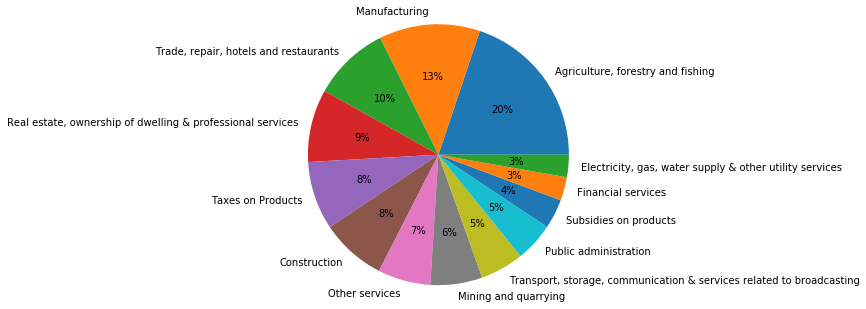

In [50]:
# Pie chart for Category3

df_GDP_pie3=df_GDP_c3_all_grp_sum[df_GDP_c3_all_grp_sum.index!="Gross State Domestic Product"]["2014-15"]

labels = df_GDP_pie3.index.tolist()
sizes = df_GDP_pie3.values.tolist()

plt.pie(sizes, labels=labels, autopct='%1.0f%%',shadow=False,radius=1.5)
plt.show()

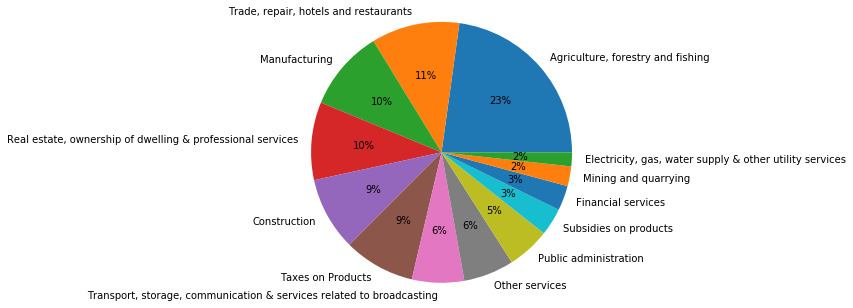

In [51]:
# Pie chart for Category4

df_GDP_pie4=df_GDP_c4_all_grp_sum[df_GDP_c4_all_grp_sum.index!="Gross State Domestic Product"]["2014-15"]

labels = df_GDP_pie4.index.tolist()
sizes = df_GDP_pie4.values.tolist()

plt.pie(sizes, labels=labels, autopct='%1.0f%%',shadow=False,radius=1.5)
plt.show()

**Plot correlation between sectors,sub-sectors/GDP**

In [52]:
# Create dataframe with numeric columns for correlation
df_gsdp_combined_trial = df_gsdp_combined.copy()
#Preparing columns list
list_cols=df_gsdp_combined_trial["Item"].tolist()
cols_new=list_cols[:33]
cols_new.insert(0,"state")

# We will unstack the dataframe for each state and assign new columns
df_gsdp_combined_trial = df_gsdp_combined.copy()
df_gsdp_combined_trial["2014-15"] = pd.to_numeric(df_gsdp_combined_trial["2014-15"], errors='coerce')

# We will unstack the dataframe for each state and assign new columns
df_gsdp_t = df_gsdp_combined_trial.groupby("state")["2014-15"].apply(lambda df: df.reset_index(drop=True)).unstack().reset_index()
df_gsdp_t.columns = cols_new

Plot correlation for Sector (2014-15)

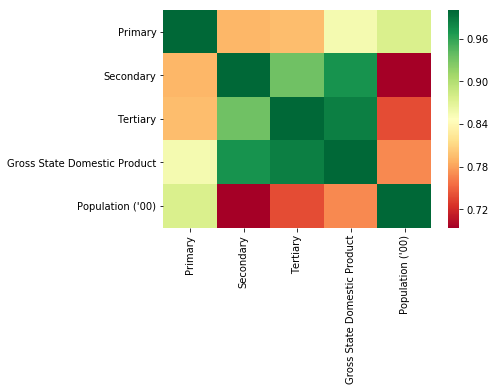

In [53]:
#Sector correlation
sec_corr = ["Primary","Secondary","Tertiary","Gross State Domestic Product","Population ('00)"]
secgdp_corr=df_gsdp_t[sec_corr].corr()
secgdp_corr

# Heatmap
sns.heatmap(secgdp_corr, cmap="RdYlGn")

Plot correlation for sub-sectors (2014-15)

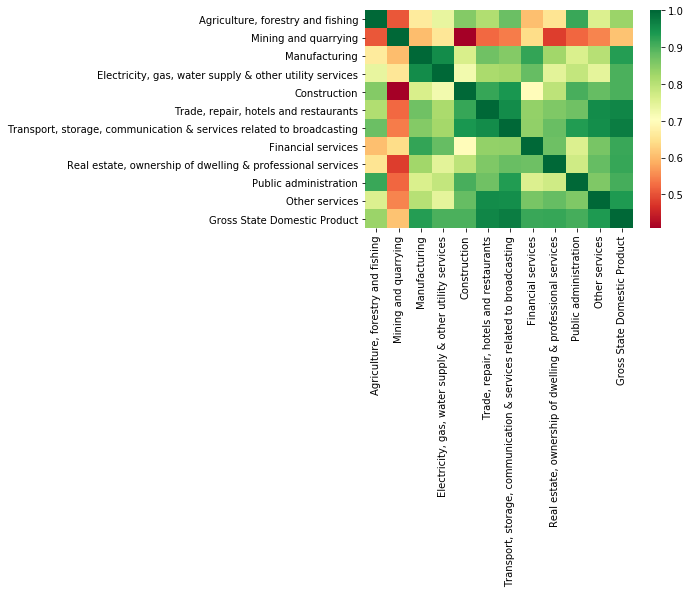

In [54]:
#Sub-Sector Correlation
sub_sec_corr = ['Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services','Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting',
'Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services','Gross State Domestic Product']
sub_secgdp_corr=df_gsdp_t[sub_sec_corr].corr()


# sub_secgdp_corr["Gross State Domestic Product"] # Uncomment to get values
# Heatmap
sns.heatmap(sub_secgdp_corr, cmap="RdYlGn")

```df_gsdp_t_c<n>``` Individual catgory dataframe for correleation 

In [55]:
# Create Category specific datafraames
df_gsdp_t_c1=df_gsdp_t[df_gsdp_t["state"].isin(c1_state)].copy()
df_gsdp_t_c2=df_gsdp_t[df_gsdp_t["state"].isin(c2_state)].copy()
df_gsdp_t_c3=df_gsdp_t[df_gsdp_t["state"].isin(c3_state)].copy()
df_gsdp_t_c4=df_gsdp_t[df_gsdp_t["state"].isin(c4_state)].copy()

Plot correlaton for individual categories

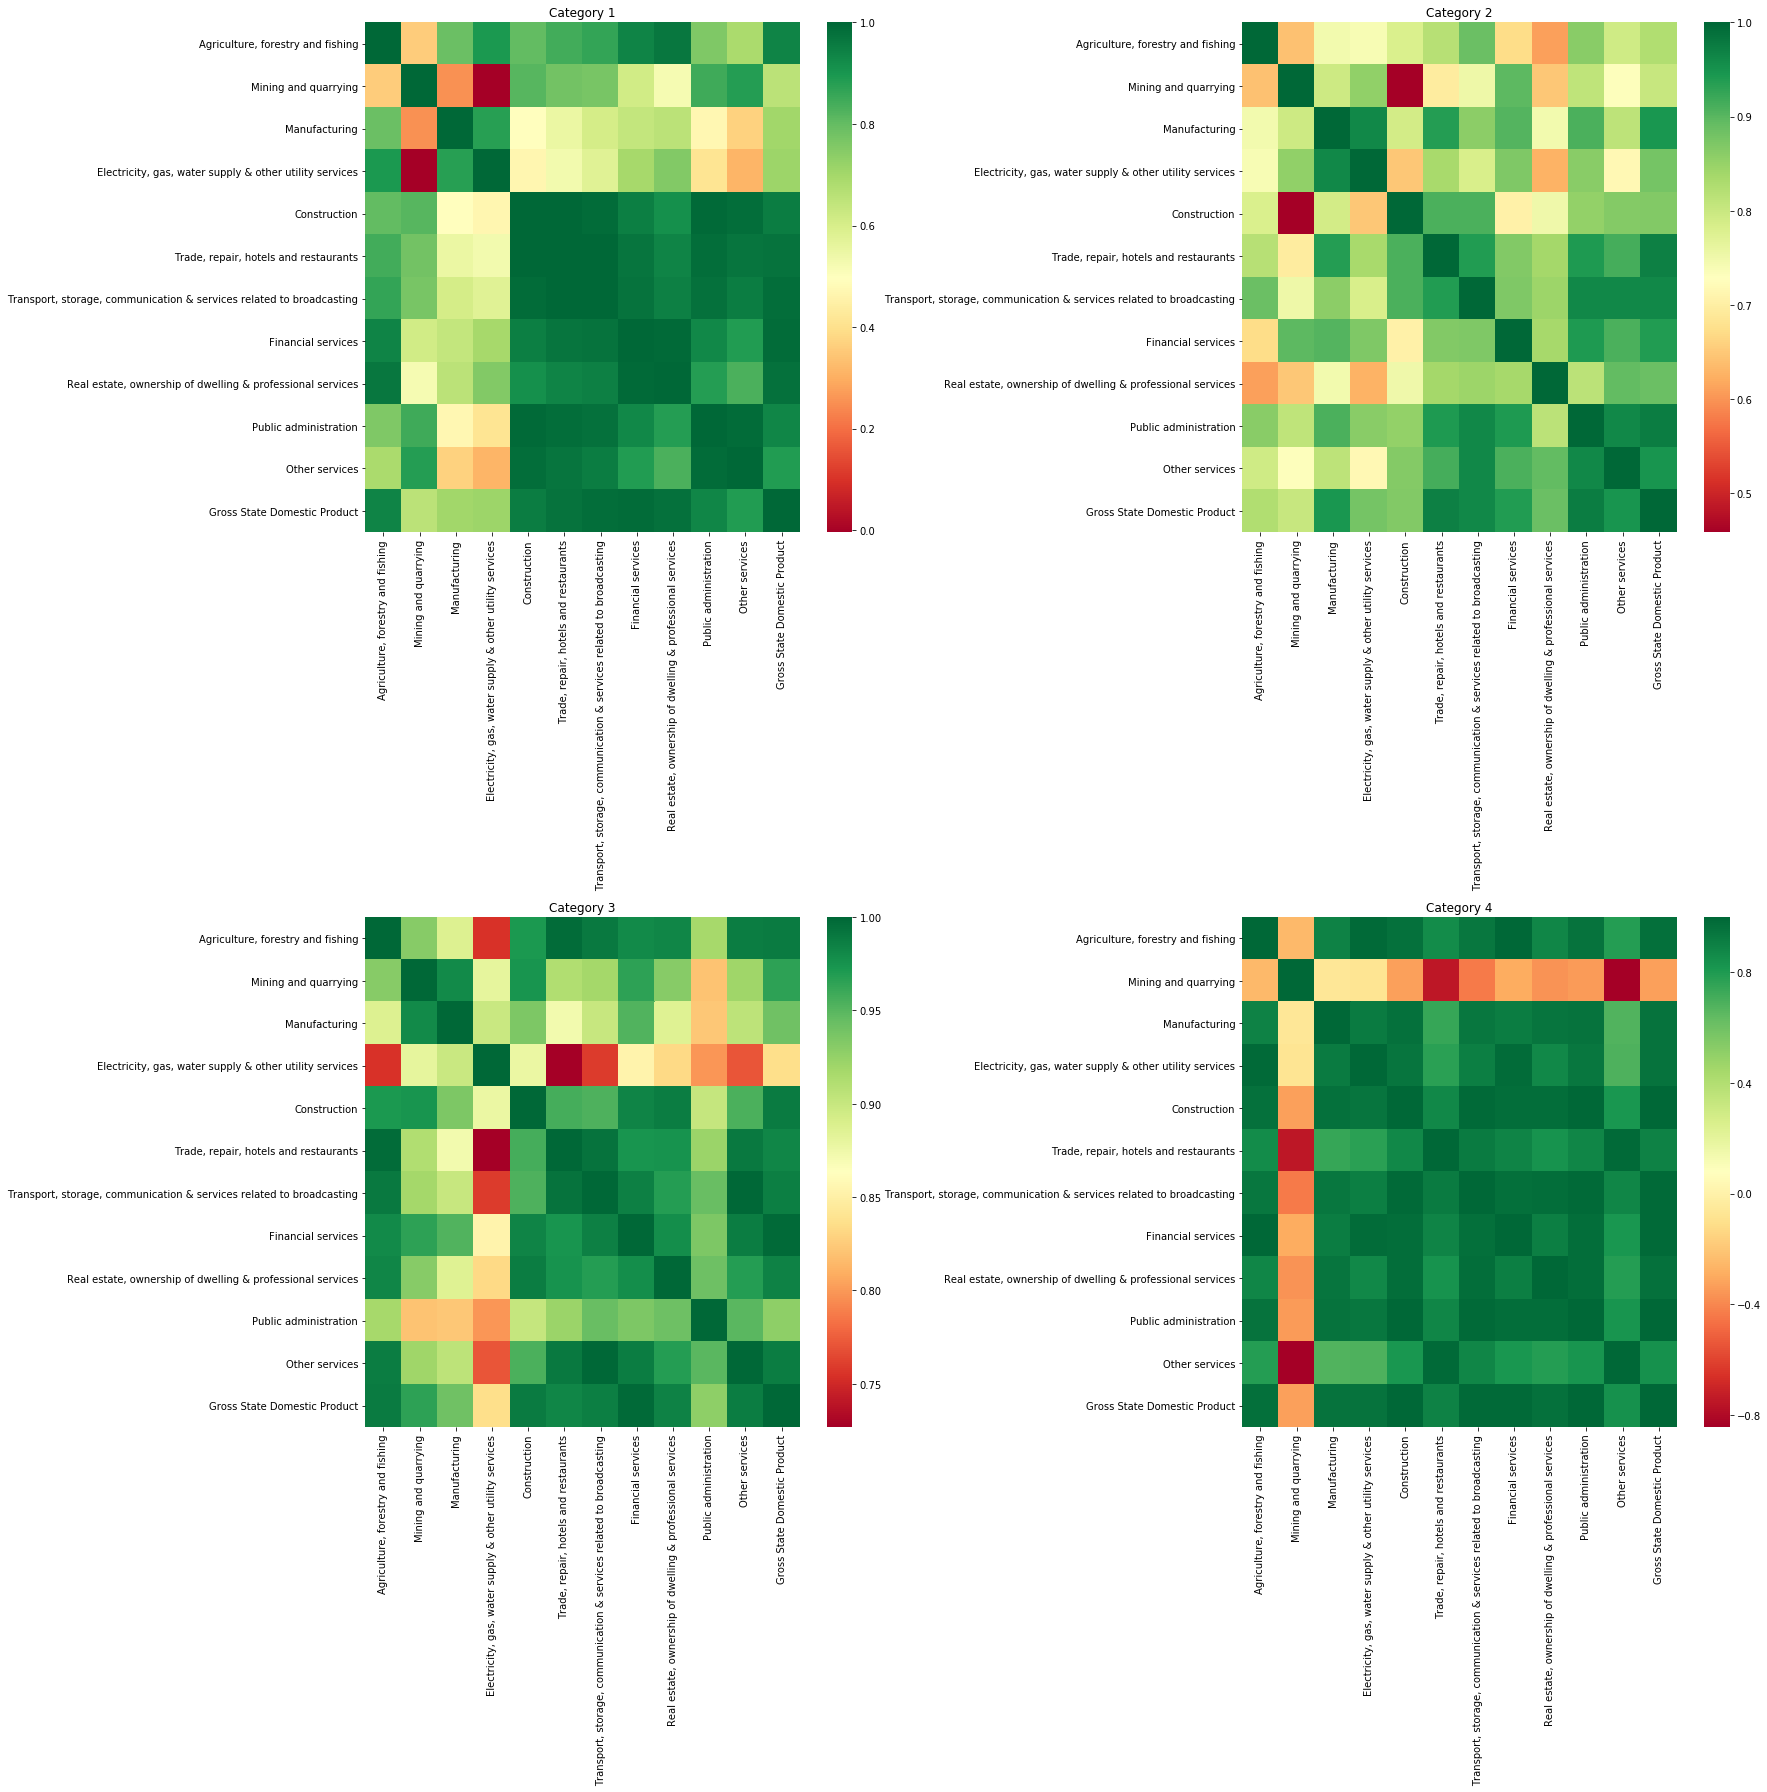

In [56]:
#Correlation for caategory 1 sub-sectors
sub_secgdp_corr_c1=df_gsdp_t_c1[sub_sec_corr].corr()
sub_secgdp_corr_c1["Gross State Domestic Product"]

#Correlation for caategory 2 sub-sectors
sub_secgdp_corr_c2=df_gsdp_t_c2[sub_sec_corr].corr()
sub_secgdp_corr_c2["Gross State Domestic Product"]

#Correlation for caategory 3 sub-sectors
sub_secgdp_corr_c3=df_gsdp_t_c3[sub_sec_corr].corr()
sub_secgdp_corr_c3["Gross State Domestic Product"]

#Correlation for caategory 4 sub-sectors
sub_secgdp_corr_c4=df_gsdp_t_c4[sub_sec_corr].corr()
sub_secgdp_corr_c4["Gross State Domestic Product"]

plt.figure(1,figsize=(25,25))

# Heatmap Category 1
plt.subplot(2,2,1)
plt.title("Category 1")
sns.heatmap(sub_secgdp_corr_c1, cmap="RdYlGn")

# Heatmap Category 2
plt.subplot(2,2,2)
plt.title("Category 2")
sns.heatmap(sub_secgdp_corr_c2, cmap="RdYlGn")

## Heatmap Category 3
plt.subplot(2,2,3)
plt.title("Category 3")
sns.heatmap(sub_secgdp_corr_c3, cmap="RdYlGn")

# Heatmap Category 4
plt.subplot(2,2,4)
plt.title("Category 4")
sns.heatmap(sub_secgdp_corr_c4, cmap="RdYlGn")

plt.tight_layout()
plt.show()

## Part II - GDP and Education Dropout Rates

Analyse correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for each state. 

```df_dropout_all``` - Import dropout rate dataset for states

In [57]:
#Import dropout rate dataset for states

#Moving to main folder
os.chdir("..")

#Verification step to ensure we are in correct folder
print(os.getcwd())

df_dropout_all=pd.read_csv("./Data II/rs_session243_au570_1.1.csv")
df_dropout_all.head()

C:\Users\rush2\Downloads\IIITB\GDP Analysis\Hemant Sawakare - GDP Analysis Submission_V2.0\Hemant Sawakare - GDP Analysis Submission


,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


**Observation** - <br>
1.Primary 2014-2015 occurs twice in the data <br>
2.This appears to be Typo - First occurrence appears to be Primary 2013-2014 <br>
3.We will ignore the first occurrence and consider second occurrence (Primary - 2014-2015.1) for our processing

Remove union territories and select data for 2014-15

In [58]:
# df_dropout_all.columns
cols2015=["Level of Education - State","Primary - 2014-2015.1","Upper Primary - 2014-2015","Secondary - 2014-2015","Senior Secondary - 2014-2015"]

# Define Union Territories
UTlist=["A & N Islands","Chandigarh","Dadra & Nagar Haveli","Daman & Diu","Delhi","Lakshadweep","Puducherry"]

# Filter out Union Territories
df_dropout_state=df_dropout_all[~df_dropout_all["Level of Education - State"].isin(UTlist)][cols2015]
df_dropout_state

,Level of Education - State,Primary - 2014-2015.1,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015
1,Andhra Pradesh,6.72,5.20,15.71,NaN
2,Arunachal Pradesh,10.82,6.71,17.11,18.42
3,Assam,15.36,10.51,27.06,NaN
4,Bihar,NaN,4.08,25.90,NaN
6,Chhatisgarh,2.91,5.85,21.26,2.76
10,Goa,0.73,0.07,11.15,13.91
11,Gujarat,0.89,6.41,25.04,7.04
12,Haryana,5.61,5.81,15.89,5.75
13,Himachal Pradesh,0.64,0.87,6.07,7.41
14,Jammu and Kashmir,6.79,5.44,17.28,12.65


**Data cleaning activity** <br>
    1. States have _ in Part1A (GSDP file). <br>
    2. Jammu and Kashmir is Jammu_Kashmir in Part1A (GSDP file).
    3. Uttrakhand is spelled incorrectly. Change it to "Uttarakhand" <br>
    4. Chhatisgarh is spelled incorrectly. Change it to "Chhattisgarh" <br>


In [59]:
# Replace " " with "_"
# Replace " and " with "_"
df_dropout_state["Level of Education - State"] = df_dropout_state["Level of Education - State"].apply(lambda s:"_".join(s.split(" and ")))
df_dropout_state["Level of Education - State"] = df_dropout_state["Level of Education - State"].apply(lambda s:"_".join(s.split(" ")))

#Rename Uttarakhand and Chhattisgarh to make is consistent with other dataframe
df_dropout_state.loc[(df_dropout_state["Level of Education - State"]=="Uttrakhand"),["Level of Education - State"]] ="Uttarakhand" 
df_dropout_state.loc[(df_dropout_state["Level of Education - State"]=="Chhatisgarh"),["Level of Education - State"]] ="Chhattisgarh" 

df_dropout_state

,Level of Education - State,Primary - 2014-2015.1,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015
1,Andhra_Pradesh,6.72,5.20,15.71,NaN
2,Arunachal_Pradesh,10.82,6.71,17.11,18.42
3,Assam,15.36,10.51,27.06,NaN
4,Bihar,NaN,4.08,25.90,NaN
6,Chhattisgarh,2.91,5.85,21.26,2.76
10,Goa,0.73,0.07,11.15,13.91
11,Gujarat,0.89,6.41,25.04,7.04
12,Haryana,5.61,5.81,15.89,5.75
13,Himachal_Pradesh,0.64,0.87,6.07,7.41
14,Jammu_Kashmir,6.79,5.44,17.28,12.65


```df_dropout_merge``` - Merging ```df1_perCapita_GDP``` and ```df_dropout_state```

In [60]:
# Merge dropout and Per Capita GDP dataframe
df_dropout_merge =pd.merge(df_dropout_state,df1_perCapita_GDP,how='inner', left_on="Level of Education - State",right_on="state")

In [61]:
# Verification Step
df_dropout_merge.head()

,Level of Education - State,Primary - 2014-2015.1,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015,S.No.,Item,2014-15
0,Andhra_Pradesh,6.72,5.20,15.71,NaN,17,Per Capita GSDP (Rs.),104977
1,Arunachal_Pradesh,10.82,6.71,17.11,18.42,17,Per Capita GSDP (Rs.),112718
2,Assam,15.36,10.51,27.06,NaN,17,Per Capita GSDP (Rs.),60621
3,Bihar,NaN,4.08,25.90,NaN,17,Per Capita GSDP (Rs.),33954
4,Chhattisgarh,2.91,5.85,21.26,2.76,17,Per Capita GSDP (Rs.),86860


In [62]:
# Renamin Column
df_dropout_merge.rename(columns={"2014-15":"GDP PerCapita"},inplace=True)

In [63]:
# Dropping "Item" Columns
cols2drop=["S.No.","Item"]
df_dropout_merge.drop(cols2drop,axis=1,inplace=True)
df_dropout_merge.head()

,Level of Education - State,Primary - 2014-2015.1,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015,GDP PerCapita
0,Andhra_Pradesh,6.72,5.20,15.71,NaN,104977
1,Arunachal_Pradesh,10.82,6.71,17.11,18.42,112718
2,Assam,15.36,10.51,27.06,NaN,60621
3,Bihar,NaN,4.08,25.90,NaN,33954
4,Chhattisgarh,2.91,5.85,21.26,2.76,86860


In [64]:
# GDP PerCapita column - Converting to numeric for correlation calculation
df_dropout_merge["GDP PerCapita"] = pd.to_numeric(df_dropout_merge["GDP PerCapita"], errors='coerce')

In [65]:
#Verification step
df_dropout_merge.info()
df_dropout_merge.mean()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 6 columns):
Level of Education - State      28 non-null object
Primary - 2014-2015.1           25 non-null float64
Upper Primary - 2014-2015       26 non-null float64
Secondary - 2014-2015           28 non-null float64
Senior Secondary - 2014-2015    20 non-null float64
GDP PerCapita                   28 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.5+ KB


Primary - 2014-2015.1                5.193200
Upper Primary - 2014-2015            4.540385
Secondary - 2014-2015               17.788571
Senior Secondary - 2014-2015         6.265000
GDP PerCapita                   113941.678571
dtype: float64

**Check distribution of dropout acorss Per Capita GDP**

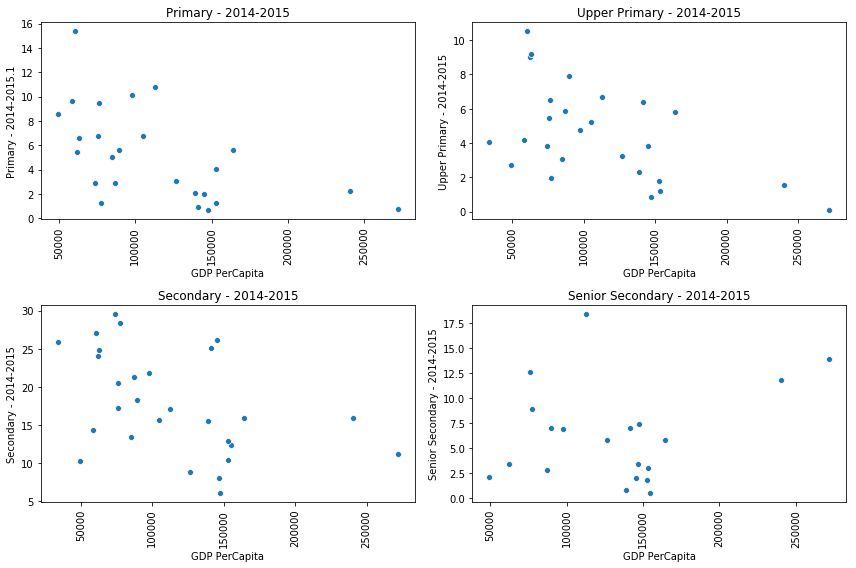

In [66]:
# Scatter plot for Per Capita vs Education dropout

plt.figure(1,figsize=(12,8))

# create the first subplot in figure 1 
# Impact of Primary dropout on Per Capita GDP
plt.subplot(2,2,1)
x=df_dropout_merge["Level of Education - State"]
plt.xticks(rotation=90)
plt.title("Primary - 2014-2015")
sns.scatterplot(x="GDP PerCapita",y="Primary - 2014-2015.1",data=df_dropout_merge)

# create the first subplot in figure 2 
# Impact of Upper Primary dropout on Per Capita GDP
plt.subplot(2,2,2)
x=df_dropout_merge["Level of Education - State"]
plt.xticks(rotation=90)
plt.title("Upper Primary - 2014-2015")
sns.scatterplot(x="GDP PerCapita",y="Upper Primary - 2014-2015",data=df_dropout_merge)

# create the first subplot in figure 3 
# Impact of Primary dropout on Per Capita GDP
plt.subplot(2,2,3)
x=df_dropout_merge["Level of Education - State"]
plt.xticks(rotation=90)
plt.title("Secondary - 2014-2015")
sns.scatterplot(x="GDP PerCapita",y="Secondary - 2014-2015",data=df_dropout_merge)

# create the first subplot in figure 1 
# Impact of Primary dropout on Per Capita GDP
plt.subplot(2,2,4)
x=df_dropout_merge["Level of Education - State"]
plt.xticks(rotation=90)
plt.title("Senior Secondary - 2014-2015")
sns.scatterplot(x="GDP PerCapita",y="Senior Secondary - 2014-2015",data=df_dropout_merge)

plt.tight_layout()
plt.show()

Calculating correlation between education droupout and PerCapita <br>
**Plot Correlation**

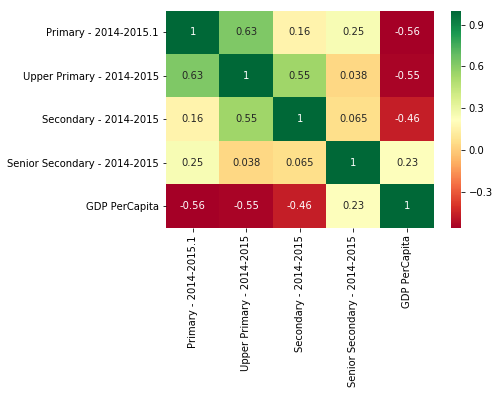

In [67]:
correl=df_dropout_merge.corr()
sns.heatmap(correl, cmap="RdYlGn", annot=True)

**Plot impact of droupouts on Level of Education for Year 2014-15**

In [68]:
# Sort dataframe for better plots
df_dropout_merge.sort_values(by="GDP PerCapita",inplace=True)
df_dropout_merge.head() #Verification

,Level of Education - State,Primary - 2014-2015.1,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015,GDP PerCapita
3,Bihar,NaN,4.08,25.90,NaN,33954
26,Uttar_Pradesh,8.58,2.70,10.22,2.10,49450
15,Manipur,9.66,4.20,14.38,NaN,58442
2,Assam,15.36,10.51,27.06,NaN,60621
10,Jharkhand,5.48,8.99,24.00,3.41,62091


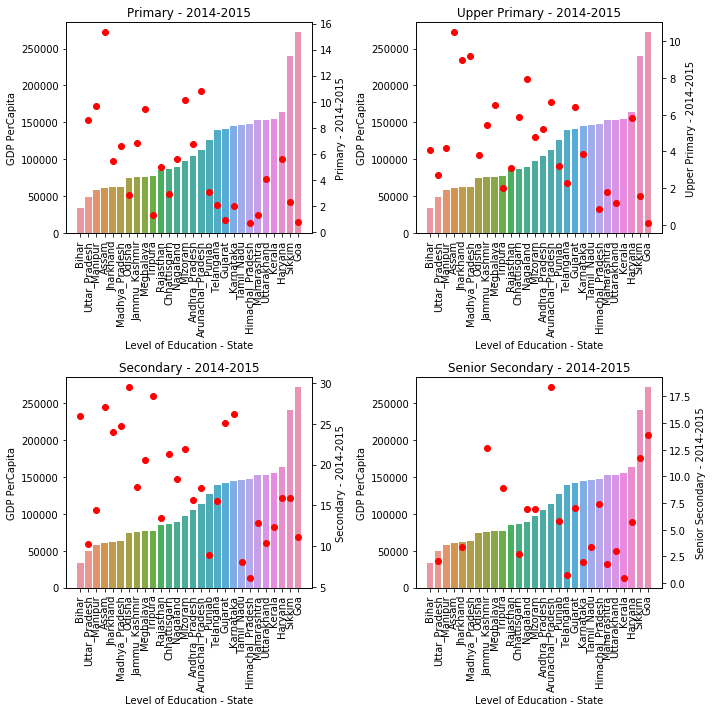

In [69]:
plt.figure(1,figsize=(10,10))

# df_dropout_merge=df_dropout_merge.sort_values(by="GDP PerCapita",inplace=True)

# create the first subplot in figure 1 
# Impact of Primary dropout on Per Capita GDP
plt.subplot(2,2,1)
x=df_dropout_merge["Level of Education - State"]
y1=df_dropout_merge["Primary - 2014-2015.1"] 
plt.xticks(rotation=90)
plt.title("Primary - 2014-2015")
sns.barplot(x="Level of Education - State",y="GDP PerCapita",data=df_dropout_merge)
plt.twinx()
plt.ylabel("Primary - 2014-2015")
# plt.yticks(rotation=30)
plt.plot(x,y1,"ro")

# create the first subplot in figure 2
# Impact of Upper Primary dropout on Per Capita GDP
plt.subplot(2,2,2)
x=df_dropout_merge["Level of Education - State"]
y1=df_dropout_merge["Upper Primary - 2014-2015"] 
plt.xticks(rotation=90)
plt.title("Upper Primary - 2014-2015")
sns.barplot(x="Level of Education - State",y="GDP PerCapita",data=df_dropout_merge)
plt.twinx()
plt.ylabel("Upper Primary - 2014-2015")
# plt.yticks(rotation=30)
plt.plot(x,y1,"ro")


# create the first subplot in figure 3 
# Impact of Secondary dropout on Per Capita GDP
plt.subplot(2,2,3)
x=df_dropout_merge["Level of Education - State"]
y1=df_dropout_merge["Secondary - 2014-2015"] 
plt.xticks(rotation=90)
plt.title("Secondary - 2014-2015")
sns.barplot(x="Level of Education - State",y="GDP PerCapita",data=df_dropout_merge)
plt.twinx()
plt.ylabel("Secondary - 2014-2015")
# plt.yticks(rotation=30)
plt.plot(x,y1,"ro")


# create the first subplot in figure 4 
# Impact of Senior Secondary dropout on Per Capita GDP
plt.subplot(2,2,4)
x=df_dropout_merge["Level of Education - State"]
y1=df_dropout_merge["Senior Secondary - 2014-2015"] 
plt.xticks(rotation=90)
plt.title("Senior Secondary - 2014-2015")
sns.barplot(x="Level of Education - State",y="GDP PerCapita",data=df_dropout_merge)
plt.twinx()
plt.ylabel("Senior Secondary - 2014-2015")
# plt.yticks(rotation=30)
plt.plot(x,y1,"ro")

plt.tight_layout()
plt.show()

**Determine dropoup by Category**

In [70]:
# Dropout rate for Category C1
df_dropout_merge_C1=pd.DataFrame()
df_dropout_merge_C1=df_dropout_merge[df_dropout_merge["Level of Education - State"].isin(c1_state)]

# Dropout rate for Category C2
df_dropout_merge_C2=pd.DataFrame()
df_dropout_merge_C2=df_dropout_merge[df_dropout_merge["Level of Education - State"].isin(c2_state)]

# Dropout rate for Category C3
df_dropout_merge_C3=pd.DataFrame()
df_dropout_merge_C3=df_dropout_merge[df_dropout_merge["Level of Education - State"].isin(c3_state)]

# Dropout rate for Category C4
df_dropout_merge_C4=pd.DataFrame()
df_dropout_merge_C4=df_dropout_merge[df_dropout_merge["Level of Education - State"].isin(c4_state)]

print(round(df_dropout_merge_C1.mean(),2))
print("************")
print(round(df_dropout_merge_C2.mean(),2))
print("************")
print(round(df_dropout_merge_C3.mean(),2))
print("************")
print(round(df_dropout_merge_C4.mean(),2))
print("************")

Primary - 2014-2015.1                3.16
Upper Primary - 2014-2015            2.16
Secondary - 2014-2015               13.13
Senior Secondary - 2014-2015         6.98
GDP PerCapita                   196799.60
dtype: float64
************
Primary - 2014-2015.1                3.44
Upper Primary - 2014-2015            3.79
Secondary - 2014-2015               15.05
Senior Secondary - 2014-2015         5.83
GDP PerCapita                   135158.44
dtype: float64
************
Primary - 2014-2015.1               5.50
Upper Primary - 2014-2015           4.92
Secondary - 2014-2015              21.33
Senior Secondary - 2014-2015        7.64
GDP PerCapita                   82799.50
dtype: float64
************
Primary - 2014-2015.1               9.13
Upper Primary - 2014-2015           6.61
Secondary - 2014-2015              21.06
Senior Secondary - 2014-2015        2.76
GDP PerCapita                   54591.17
dtype: float64
************


In [71]:
# Sort the category dataframes for better plots

df_dropout_merge_C1=df_dropout_merge_C1.sort_values(by="GDP PerCapita")
df_dropout_merge_C2=df_dropout_merge_C2.sort_values(by="GDP PerCapita")
df_dropout_merge_C3=df_dropout_merge_C3.sort_values(by="GDP PerCapita")
df_dropout_merge_C4=df_dropout_merge_C4.sort_values(by="GDP PerCapita")

**Plots for C1 Category - Dropout vs per Capita GDP**

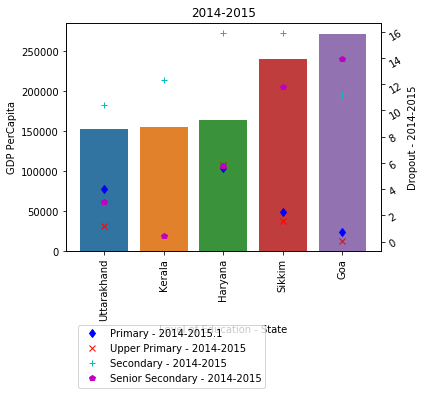

In [72]:
# Plot for C1 Category
plt.figure(1,figsize=(6,6))

# create the first subplot in figure 1 
# Impact of Primary dropout on Per Capita GDP

x=df_dropout_merge_C1["Level of Education - State"]
y1=df_dropout_merge_C1["Primary - 2014-2015.1"] 
plt.xticks(rotation=90)
plt.title("2014-2015")
sns.barplot(x="Level of Education - State",y="GDP PerCapita",data=df_dropout_merge_C1)
plt.twinx()

# Plot Primary Dropout
plt.ylabel("Dropout - 2014-2015")
plt.yticks(rotation=30)
plt.plot(x,y1,"bd")

# Plot Upper Primary Dropout
y2=df_dropout_merge_C1["Upper Primary - 2014-2015"] 
plt.plot(x,y2,"rx")

# Plot Secondary Dropout
y3=df_dropout_merge_C1["Secondary - 2014-2015"]
plt.plot(x,y3,"c+")

# Plot Senior Secondary Dropout
y4=df_dropout_merge_C1["Senior Secondary - 2014-2015"] 
plt.plot(x,y4,"mp")

#Plot Legends
plt.legend(bbox_to_anchor=(0.65, -0.30))


plt.tight_layout()
plt.show()

**Plots for C2 Category - Dropout vs per Capita GDP**

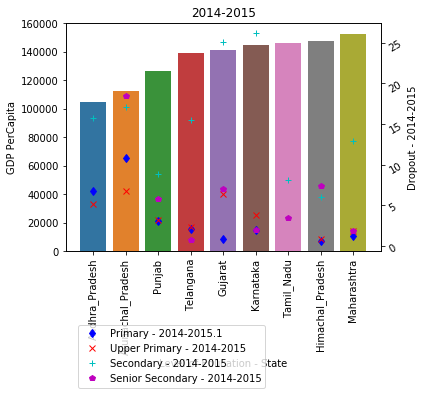

In [73]:
# Plot for C2 Category
plt.figure(1,figsize=(6,6))

# create the first subplot in figure 1 
# Impact of Primary dropout on Per Capita GDP

x=df_dropout_merge_C2["Level of Education - State"]
y1=df_dropout_merge_C2["Primary - 2014-2015.1"] 
plt.xticks(rotation=90)
plt.title("2014-2015")
sns.barplot(x="Level of Education - State",y="GDP PerCapita",data=df_dropout_merge_C2)
plt.twinx()

# Plot Primary Dropout
plt.ylabel("Dropout - 2014-2015")
plt.yticks(rotation=30)
plt.plot(x,y1,"bd")

# Plot Upper Primary Dropout
y2=df_dropout_merge_C2["Upper Primary - 2014-2015"] 
plt.plot(x,y2,"rx")

# Plot Secondary Dropout
y3=df_dropout_merge_C2["Secondary - 2014-2015"]
plt.plot(x,y3,"c+")

# Plot Senior Secondary Dropout
y4=df_dropout_merge_C2["Senior Secondary - 2014-2015"] 
plt.plot(x,y4,"mp")

#Plot Legends
plt.legend(bbox_to_anchor=(0.65, -0.30))


plt.tight_layout()
plt.show()

**Plots for C3 Category - Dropout vs per Capita GDP**

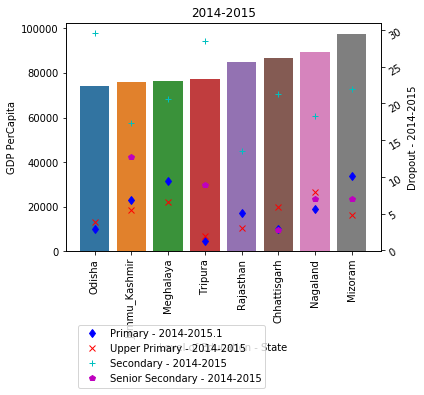

In [74]:
# Plot for C3 Category
plt.figure(1,figsize=(6,6))

# create the first subplot in figure 1 
# Impact of Primary dropout on Per Capita GDP

x=df_dropout_merge_C3["Level of Education - State"]
y1=df_dropout_merge_C3["Primary - 2014-2015.1"] 
plt.xticks(rotation=90)
plt.title("2014-2015")
sns.barplot(x="Level of Education - State",y="GDP PerCapita",data=df_dropout_merge_C3)
plt.twinx()

# Plot Primary Dropout
plt.ylabel("Dropout - 2014-2015")
plt.yticks(rotation=30)
plt.plot(x,y1,"bd")

# Plot Upper Primary Dropout
y2=df_dropout_merge_C3["Upper Primary - 2014-2015"] 
plt.plot(x,y2,"rx")

# Plot Secondary Dropout
y3=df_dropout_merge_C3["Secondary - 2014-2015"]
plt.plot(x,y3,"c+")

# Plot Senior Secondary Dropout
y4=df_dropout_merge_C3["Senior Secondary - 2014-2015"] 
plt.plot(x,y4,"mp")

#Plot Legends
plt.legend(bbox_to_anchor=(0.65, -0.30))


plt.tight_layout()
plt.show()

**Plots for C4 Category - Dropout vs per Capita GDP**

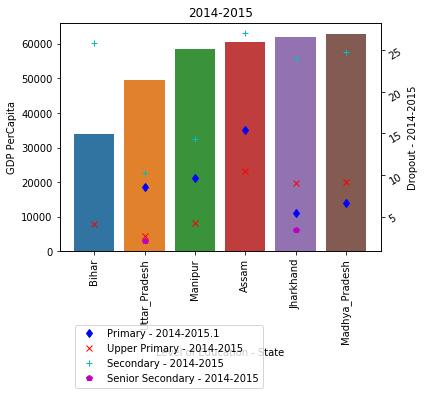

In [75]:
# Plot for C4 Category
plt.figure(1,figsize=(6,6))

# create the first subplot in figure 1 
# Impact of Primary dropout on Per Capita GDP

x=df_dropout_merge_C4["Level of Education - State"]
y1=df_dropout_merge_C4["Primary - 2014-2015.1"] 
plt.xticks(rotation=90)
plt.title("2014-2015")
sns.barplot(x="Level of Education - State",y="GDP PerCapita",data=df_dropout_merge_C4)
plt.twinx()

# Plot Primary Dropout
plt.ylabel("Dropout - 2014-2015")
plt.yticks(rotation=30)
plt.plot(x,y1,"bd")

# Plot Upper Primary Dropout
y2=df_dropout_merge_C4["Upper Primary - 2014-2015"] 
plt.plot(x,y2,"rx")

# Plot Secondary Dropout
y3=df_dropout_merge_C4["Secondary - 2014-2015"]
plt.plot(x,y3,"c+")

# Plot Senior Secondary Dropout
y4=df_dropout_merge_C4["Senior Secondary - 2014-2015"] 
plt.plot(x,y4,"mp")

#Plot Legends
plt.legend(bbox_to_anchor=(0.65, -0.30))


plt.tight_layout()
plt.show()